In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/diabetes.csv


In [2]:
df = pd.read_csv("/kaggle/input/diabetes/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#Pregnancies - outliers , max 17?
#Glucose - 

**2. get categorical and numerical variables**

In [6]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
cat_cols

[]

In [7]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O']
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [8]:
df["Outcome"].nunique()

2

In [9]:
num_but_cat_cols = [col for col in df.columns if df[col].nunique() < 10 ]
num_but_cat_cols

['Outcome']

In [10]:
num_cols = [col for col in num_cols if col not in num_but_cat_cols]
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

**3.Analysis of numerical and categorical columns**

only target variable seems categorical , but we can generate new categorical columns from BMI(obesity) , Age(oldness) , Insulin(normal - not normal) , BloodPressure(normal-not normal) etc.

**4 . Target Value analysis**

In [11]:
df.groupby("Outcome").agg({"Pregnancies":["mean","count"], "Glucose":"mean", "BloodPressure":"mean","SkinThickness":"mean","Insulin":"mean","BMI":"mean","DiabetesPedigreeFunction":"mean","Age":"mean" })

Pregnancies           Glucose BloodPressure SkinThickness     Insulin  \
               mean count        mean          mean          mean        mean   
Outcome                                                                         
0          3.298000   500  109.980000     68.184000     19.664000   68.792000   
1          4.865672   268  141.257463     70.824627     22.164179  100.335821   

               BMI DiabetesPedigreeFunction        Age  
              mean                     mean       mean  
Outcome                                                 
0        30.304200                 0.429734  31.190000  
1        35.142537                 0.550500  37.067164

**5.Outlier Analysis**

<Axes: >

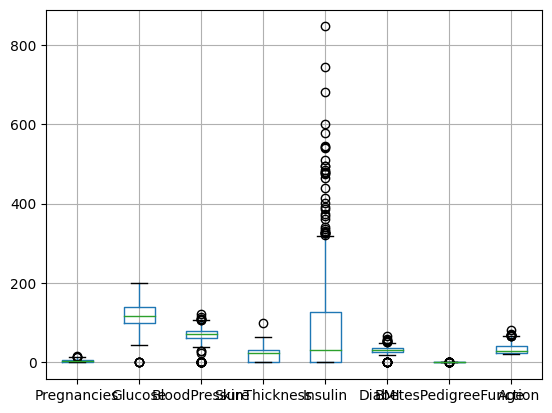

In [12]:
df.boxplot(column = num_cols )

**Soru: scale farkı var bu plotu daha güzel nasıl yaparız?**

In [13]:
def IQR(df,col,low=0.25,up=0.75):
    q1 = df[col].quantile(low)
    q3 = df[col].quantile(up)
    IQR = q3-q1
    low_limit = q1-1.5*IQR
    up_limit = q3+1.5*IQR
    return low_limit,up_limit

In [14]:
for col in num_cols:
    low_limit,up_limit = IQR(df,col)
    print( df.loc[(df[col] < low_limit) | (df[col] > up_limit) , col] )
    print("----")

88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64
----
75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64
----
7        0
15       0
18      30
43     110
49       0
60       0
78       0
81       0
84     108
106    122
125     30
172      0
177    110
193      0
222      0
261      0
266      0
269      0
300      0
332      0
336      0
347      0
357      0
362    108
426      0
430      0
435      0
453      0
468      0
484      0
494      0
522      0
533      0
535      0
549    110
589      0
597     24
601      0
604      0
619      0
643      0
691    114
697      0
703      0
706      0
Name: BloodPressure, dtype: int64
----
579    99
Name: SkinThickness, dtype: int64
----
8      543
13     846
54     342
111    495
139    325
153    485
186    495
220    478
228    744
231    370
247    680
248    402
258    375
286    545
296    360
360    325
370    465
375    325
392    415
409    579
415    474
480    328
486    480
519    32

**LOF Method**

In [15]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)

df_scores = clf.negative_outlier_factor_
np.sort(df_scores)[0:5]



array([-2.59693313, -2.48872536, -2.44091629, -2.42704822, -2.40372289])

**Soru : Burada outcome ı da göndermeli miyiz LOF a ?**

<Axes: title={'center': 'Elbow Method'}>

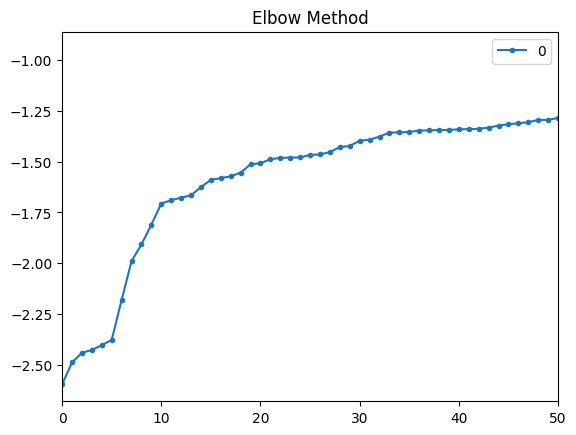

In [16]:

scores = pd.DataFrame(np.sort(
    df_scores))
scores.plot(stacked=True,xlim=[0,50],
            style='.-',title = 'Elbow Method')



In [17]:
th = np.sort(df_scores)[10]
df[df_scores < th]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1
75,1,0,48,20,0,24.7,0.140,22,0
106,1,96,122,0,0,22.4,0.207,27,0
182,1,0,74,20,23,27.7,0.299,21,0
228,4,197,70,39,744,36.7,2.329,31,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
459,9,134,74,33,60,25.9,0.460,81,0
502,6,0,68,41,0,39.0,0.727,41,1
579,2,197,70,99,0,34.7,0.575,62,1


**5.Missing Value Analysis**

In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

it seems no missing values , but there are 0's in some of the columns,

In [19]:
for col in df.columns.difference(["Outcome","Pregnancies"]):
    print( col , df[col].apply(lambda x :  x<= 0 ).sum() ,'%', 100 * df[col].apply(lambda x :  x<= 0 ).sum() /df[col].shape[0] )

Age 0 % 0.0
BMI 11 % 1.4322916666666667
BloodPressure 35 % 4.557291666666667
DiabetesPedigreeFunction 0 % 0.0
Glucose 5 % 0.6510416666666666
Insulin 374 % 48.697916666666664
SkinThickness 227 % 29.557291666666668


In [20]:
missing_values = df[df.columns.difference(["Outcome","Pregnancies"])].apply(lambda x : x <= 0 , axis = 0).sum(axis = 1)

missing_values = missing_values.apply(lambda x: bool(x))



In [21]:
df[missing_values]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


**376 rows has at least one missing value**

**Correlation Analysis**

In [22]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

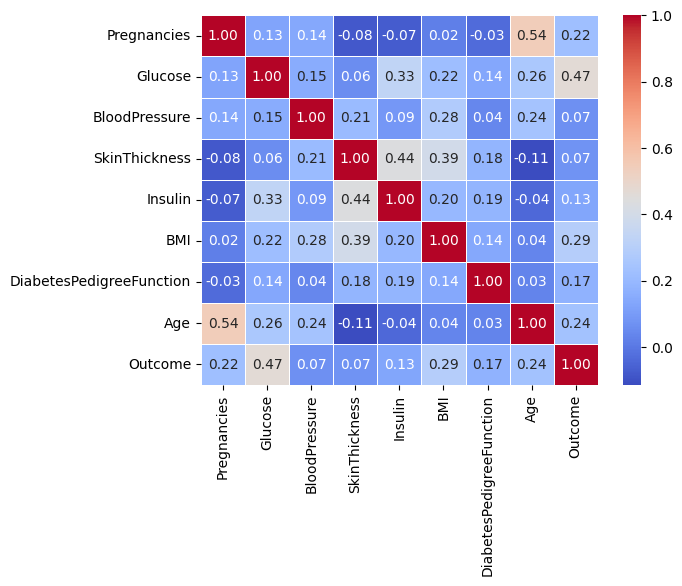

In [23]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# **Feature Engineering**
**1 .Solve missing values and outlier problems**

In [24]:
# assing nan values for non-logical 0 values
for col in df.columns.difference(["Outcome","Pregnancies"]):
    df.loc[df[col]<=0,col] = np.nan

In [25]:
df[missing_values]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30.0,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29.0,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43.0,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33.0,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27.0,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47.0,1


<Axes: >

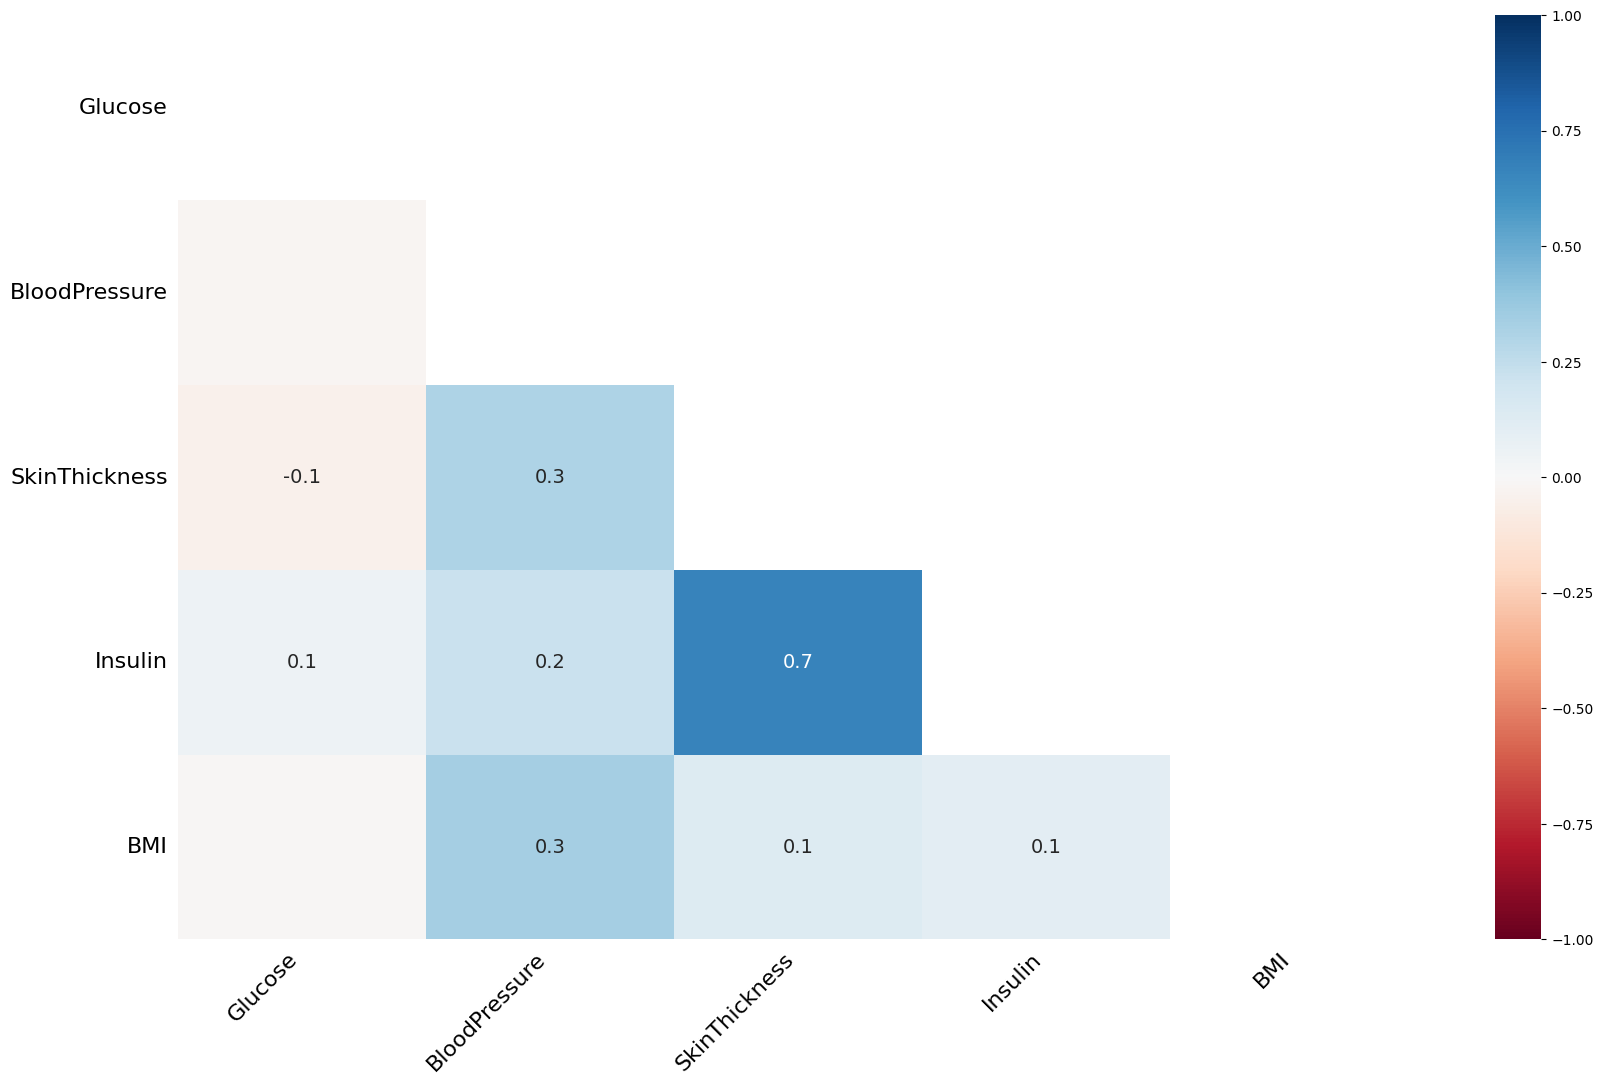

In [26]:
import missingno as msno
msno.heatmap(df)

skinthickness - insulin iliskisi 0.7 , yorum?

**2 methods for outliers**
1. delete
2. suppress

In [27]:
df_outliers_deleted = df.copy()
deleted_sum  = 0
for col in df_outliers_deleted.columns:
    low_limit , up_limit = IQR(df_outliers_deleted,col)
    deleted_sum += df_outliers_deleted[ (df_outliers_deleted[col] < low_limit) | (df_outliers_deleted[col] > up_limit)  ].shape[0]
    print(col,df_outliers_deleted[ (df_outliers_deleted[col] < low_limit) | (df_outliers_deleted[col] > up_limit)  ].shape[0])
    df_outliers_deleted.drop( df_outliers_deleted[ (df_outliers_deleted[col] < low_limit) | (df_outliers_deleted[col] > up_limit)  ].index,inplace=True )
    
print("deleted_sum ",deleted_sum)

Pregnancies 4
Glucose 0
BloodPressure 14
SkinThickness 3
Insulin 24
BMI 7
DiabetesPedigreeFunction 29
Age 15
Outcome 0
deleted_sum  96


In [28]:
df_outliers_deleted.shape

(672, 9)

In [29]:
df_outliers_suppressed = df.copy()

for col in df_outliers_suppressed.columns:
    low_limit , up_limit = IQR(df_outliers_suppressed,col)
    df_outliers_suppressed.loc[ df_outliers_suppressed[col] < low_limit, col] = low_limit
    df_outliers_suppressed.loc[ df_outliers_suppressed[col] > up_limit, col] = up_limit



**3 methods for missing values**
1. fill with mean-median-mode
2. kategorik deger kırılımında deger atama
3. KNNImputer


In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

scaler = MinMaxScaler()
imputer = KNNImputer(n_neighbors = 5)
df_outliers_suppressed_scaled = pd.DataFrame(scaler.fit_transform(df_outliers_suppressed) , columns = df_outliers_suppressed.columns )
df_outliers_suppressed_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.444444,0.670968,0.50000,0.56,NaN,0.480499,0.489305,0.637363,1.0
1,0.074074,0.264516,0.40625,0.44,NaN,0.262090,0.243316,0.219780,0.0
2,0.592593,0.896774,0.37500,NaN,NaN,0.159126,0.529412,0.241758,1.0
3,0.074074,0.290323,0.40625,0.32,0.230797,0.308892,0.079323,0.000000,0.0
4,0.000000,0.600000,0.00000,0.56,0.444284,0.776911,1.000000,0.263736,1.0
...,...,...,...,...,...,...,...,...,...
763,0.740741,0.367742,0.56250,0.82,0.478904,0.458658,0.082888,0.923077,0.0
764,0.148148,0.503226,0.46875,0.40,NaN,0.580343,0.233512,0.131868,0.0
765,0.370370,0.496774,0.50000,0.32,0.282726,0.249610,0.148841,0.197802,0.0
766,0.074074,0.529032,0.31250,NaN,NaN,0.371295,0.241533,0.571429,1.0


In [31]:
df_outliers_suppressed_KNNImputer = pd.DataFrame(imputer.fit_transform(df_outliers_suppressed_scaled), columns = df_outliers_suppressed_scaled.columns)
df_outliers_suppressed_KNNImputer

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.444444,0.670968,0.50000,0.560,0.820988,0.480499,0.489305,0.637363,1.0
1,0.074074,0.264516,0.40625,0.440,0.124630,0.262090,0.243316,0.219780,0.0
2,0.592593,0.896774,0.37500,0.504,0.628128,0.159126,0.529412,0.241758,1.0
3,0.074074,0.290323,0.40625,0.320,0.230797,0.308892,0.079323,0.000000,0.0
4,0.000000,0.600000,0.00000,0.560,0.444284,0.776911,1.000000,0.263736,1.0
...,...,...,...,...,...,...,...,...,...
763,0.740741,0.367742,0.56250,0.820,0.478904,0.458658,0.082888,0.923077,0.0
764,0.148148,0.503226,0.46875,0.400,0.331771,0.580343,0.233512,0.131868,0.0
765,0.370370,0.496774,0.50000,0.320,0.282726,0.249610,0.148841,0.197802,0.0
766,0.074074,0.529032,0.31250,0.416,0.332925,0.371295,0.241533,0.571429,1.0


In [32]:
df_outliers_suppressed_KNNImputer_filled = pd.DataFrame(scaler.inverse_transform(df_outliers_suppressed_KNNImputer), columns = df_outliers_suppressed_KNNImputer.columns)
df_outliers_suppressed_KNNImputer_filled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,298.575,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,57.200,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.2,231.725,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.000,43.1,1.200,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,129.000,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,27.8,129.400,30.1,0.349,47.0,1.0


In [33]:
# KNN Imputer missing value ları doldurdu
df_outliers_suppressed_KNNImputer_filled[missing_values]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,298.575,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,57.200,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.2,231.725,23.3,0.672,32.0,1.0
5,5.0,116.0,74.0,23.0,116.600,25.6,0.201,30.0,0.0
7,10.0,115.0,70.0,31.8,159.925,35.3,0.134,29.0,0.0
...,...,...,...,...,...,...,...,...,...
761,9.0,170.0,74.0,31.0,275.850,44.0,0.403,43.0,1.0
762,9.0,89.0,62.0,29.6,87.000,22.5,0.142,33.0,0.0
764,2.0,122.0,70.0,27.0,129.000,36.8,0.340,27.0,0.0
766,1.0,126.0,60.0,27.8,129.400,30.1,0.349,47.0,1.0


**2. Generate New Features**

In [34]:
df_outliers_suppressed_KNNImputer_filled["NEW_AGE"] = pd.cut( df_outliers_suppressed_KNNImputer_filled["Age"],bins = [-np.inf,30,40,50,60,np.inf],labels = ["<30","30_40","40_50","50_60",">60"])
df_outliers_suppressed_KNNImputer_filled["OBESITY"] = pd.cut(df_outliers_suppressed_KNNImputer_filled["BMI"],bins = [-np.inf,18.5,25,30,35,40,np.inf] , labels = ["Underweight","HealthWeight","OverWeight","Obese","SeverelyObese","MorbidlyObese"])
df_outliers_suppressed_KNNImputer_filled["INSULIN_RESISTANCE"] = pd.cut(df_outliers_suppressed_KNNImputer_filled["Glucose"] , bins = [-np.inf,70,90,100,125,np.inf] , labels = ["Low_Unhealty","Healty","At_Risk","Diabetes","High_Unhealty"])
df_outliers_suppressed_KNNImputer_filled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE,OBESITY,INSULIN_RESISTANCE
0,6.0,148.0,72.0,35.0,298.575,33.6,0.627,50.0,1.0,40_50,Obese,High_Unhealty
1,1.0,85.0,66.0,29.0,57.200,26.6,0.351,31.0,0.0,30_40,OverWeight,Healty
2,8.0,183.0,64.0,32.2,231.725,23.3,0.672,32.0,1.0,30_40,HealthWeight,High_Unhealty
3,1.0,89.0,66.0,23.0,94.000,28.1,0.167,21.0,0.0,<30,OverWeight,Healty
4,0.0,137.0,40.0,35.0,168.000,43.1,1.200,33.0,1.0,30_40,MorbidlyObese,High_Unhealty


**3. Encoding**

In [35]:
df_outliers_suppressed_KNNImputer_filled_extended = pd.get_dummies(df_outliers_suppressed_KNNImputer_filled,columns = ["NEW_AGE","OBESITY","INSULIN_RESISTANCE"],drop_first=True,dtype=int)
df_outliers_suppressed_KNNImputer_filled_extended

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_30_40,...,NEW_AGE_>60,OBESITY_HealthWeight,OBESITY_OverWeight,OBESITY_Obese,OBESITY_SeverelyObese,OBESITY_MorbidlyObese,INSULIN_RESISTANCE_Healty,INSULIN_RESISTANCE_At_Risk,INSULIN_RESISTANCE_Diabetes,INSULIN_RESISTANCE_High_Unhealty
0,6.0,148.0,72.0,35.0,298.575,33.6,0.627,50.0,1.0,0,...,0,0,0,1,0,0,0,0,0,1
1,1.0,85.0,66.0,29.0,57.200,26.6,0.351,31.0,0.0,1,...,0,0,1,0,0,0,1,0,0,0
2,8.0,183.0,64.0,32.2,231.725,23.3,0.672,32.0,1.0,1,...,0,1,0,0,0,0,0,0,0,1
3,1.0,89.0,66.0,23.0,94.000,28.1,0.167,21.0,0.0,0,...,0,0,1,0,0,0,1,0,0,0
4,0.0,137.0,40.0,35.0,168.000,43.1,1.200,33.0,1.0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.000,32.9,0.171,63.0,0.0,0,...,1,0,0,1,0,0,0,0,1,0
764,2.0,122.0,70.0,27.0,129.000,36.8,0.340,27.0,0.0,0,...,0,0,0,0,1,0,0,0,1,0
765,5.0,121.0,72.0,23.0,112.000,26.2,0.245,30.0,0.0,1,...,0,0,1,0,0,0,0,0,1,0
766,1.0,126.0,60.0,27.8,129.400,30.1,0.349,47.0,1.0,0,...,0,0,0,1,0,0,0,0,0,1


**4.Scaling**
3 methods:
1. Standart Scaler
2. Robust Scaler
3. MinMax Scaler

In [36]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler,RobustScaler
rs = RobustScaler()
df_outliers_suppressed_KNNImputer_filled_extended_Robust_Scaled = df_outliers_suppressed_KNNImputer_filled_extended.copy()
for col in num_cols:
    df_outliers_suppressed_KNNImputer_filled_extended_Robust_Scaled[col] = rs.fit_transform(df_outliers_suppressed_KNNImputer_filled_extended_Robust_Scaled[[col]])
df_outliers_suppressed_KNNImputer_filled_extended_Robust_Scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_30_40,...,NEW_AGE_>60,OBESITY_HealthWeight,OBESITY_OverWeight,OBESITY_Obese,OBESITY_SeverelyObese,OBESITY_MorbidlyObese,INSULIN_RESISTANCE_Healty,INSULIN_RESISTANCE_At_Risk,INSULIN_RESISTANCE_Diabetes,INSULIN_RESISTANCE_High_Unhealty
0,0.6,0.738095,0.000,0.483333,1.785752,0.170330,0.665359,1.235294,1.0,0,...,0,0,0,1,0,0,0,0,0,1
1,-0.4,-0.761905,-0.375,-0.016667,-0.771186,-0.598901,-0.056209,0.117647,0.0,1,...,0,0,1,0,0,0,1,0,0,0
2,1.0,1.571429,-0.500,0.250000,1.077595,-0.961538,0.783007,0.176471,1.0,1,...,0,1,0,0,0,0,0,0,0,1
3,-0.4,-0.666667,-0.375,-0.516667,-0.381356,-0.434066,-0.537255,-0.470588,0.0,0,...,0,0,1,0,0,0,1,0,0,0
4,-0.6,0.476190,-2.000,0.483333,0.402542,1.214286,2.163399,0.235294,1.0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.4,-0.380952,0.250,1.566667,0.529661,0.093407,-0.526797,2.000000,0.0,0,...,1,0,0,1,0,0,0,0,1,0
764,-0.2,0.119048,-0.125,-0.183333,-0.010593,0.521978,-0.084967,-0.117647,0.0,0,...,0,0,0,0,1,0,0,0,1,0
765,0.4,0.095238,0.000,-0.516667,-0.190678,-0.642857,-0.333333,0.058824,0.0,1,...,0,0,1,0,0,0,0,0,1,0
766,-0.4,0.214286,-0.750,-0.116667,-0.006356,-0.214286,-0.061438,1.058824,1.0,0,...,0,0,0,1,0,0,0,0,0,1


**5.Modeling**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
y = df_outliers_suppressed_KNNImputer_filled_extended_Robust_Scaled["Outcome"]
X = df_outliers_suppressed_KNNImputer_filled_extended_Robust_Scaled.drop(["Outcome"] , axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30 , random_state = 60) 
rf_model = RandomForestClassifier(random_state = 60).fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred,y_test)


0.7965367965367965

In [38]:
df_outliers_suppressed_KNNImputer_filled_extended_Robust_Scaled_without_Features = df_outliers_suppressed_KNNImputer_filled_extended_Robust_Scaled.loc[:,"Pregnancies":"Outcome"]
y = df_outliers_suppressed_KNNImputer_filled_extended_Robust_Scaled_without_Features["Outcome"]
X = df_outliers_suppressed_KNNImputer_filled_extended_Robust_Scaled_without_Features.drop(["Outcome"] , axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30 , random_state = 60) 
rf_model = RandomForestClassifier(random_state = 60).fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.7965367965367965